In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Descargar dataset y crear subconjunto
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
!unzip trainingandtestdata.zip
import pandas as pd
df_full = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df_full.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']
df = df_full[['text', 'polarity']].sample(n=100000, random_state=42)  # 100k tweets
df['polarity'] = df['polarity'].replace({0: 0, 4: 1})  # 0=negativo, 4=positivo -> 1
df.to_csv('/content/drive/My Drive/Tarea_RNN/sentiment140-subset.csv', index=False)

--2025-10-13 02:16:08--  http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip [following]
--2025-10-13 02:16:08--  https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81363704 (78M) [application/zip]
Saving to: ‘trainingandtestdata.zip’

trainingandtestdata 100%[===================>]  77.59M  17.1MB/s    in 5.5s    

2025-10-13 02:16:14 (14.1 MB/s) - ‘trainingandtestdata.zip’ saved [81363704/81363704]

Archive:  trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [3]:
# Descargar GloVe
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
!mv glove.6B.100d.txt '/content/drive/My Drive/Tarea_RNN/'

--2025-10-13 02:18:45--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-10-13 02:18:45--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.08MB/s    in 2m 41s  

2025-10-13 02:21:27 (5.11 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Modelo A:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 40, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,609 (4.14 MB)

 Trainable params: 1,084,609 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1329/1329 - 17s - 13ms/step - accuracy: 0.7614 - loss: 0.4893 - val_accuracy: 0.7867 - val_loss: 0.4481
Epoch 2/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8163 - loss: 0.4038 - val_accuracy: 0.7898 - val_loss: 0.4439
Epoch 3/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8385 - loss: 0.3582 - val_accuracy: 0.7891 - val_loss: 0.4746
Epoch 4/20
1329/1329 - 11s - 9ms/step - accuracy: 0.8586 - loss: 0.3166 - val_accuracy: 0.7817 - val_loss: 0.4970
Epoch 5/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8778 - loss: 0.2757 - val_accuracy: 0.7781 - val_loss: 0.5421
Epoch 6/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8956 - loss: 0.2397 - val_accuracy: 0.7757 - val_loss: 0.6068
Epoch 7/20
1329/1329 - 12s - 9ms/step - accuracy: 0.9121 - loss: 0.2062 - val_accuracy: 0.7700 - val_loss: 0.6936
Epoch 8/20
1329/1329 - 13s - 10ms/step - accuracy: 0.9255 - loss: 0.1764 - val_accuracy: 0.7589 - val_loss: 0.7655
Epoch 9/20
1329/1329 - 20s - 15ms/step - accuracy: 0.9366 - loss: 0.1511 - val_accurac

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 40, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,609 (4.14 MB)

 Trainable params: 84,609 (330.50 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/20
1329/1329 - 14s - 11ms/step - accuracy: 0.7140 - loss: 0.5518 - val_accuracy: 0.7331 - val_loss: 0.5273
Epoch 2/20
1329/1329 - 12s - 9ms/step - accuracy: 0.7571 - loss: 0.4958 - val_accuracy: 0.7611 - val_loss: 0.4913
Epoch 3/20
1329/1329 - 11s - 8ms/step - accuracy: 0.7743 - loss: 0.4706 - val_accuracy: 0.7611 - val_loss: 0.4845
Epoch 4/20
1329/1329 - 12s - 9ms/step - accuracy: 0.7860 - loss: 0.4528 - val_accuracy: 0.7667 - val_loss: 0.4813
Epoch 5/20
1329/1329 - 12s - 9ms/step - accuracy: 0.7946 - loss: 0.4378 - val_accuracy: 0.7760 - val_loss: 0.4650
Epoch 6/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8038 - loss: 0.4221 - val_accuracy: 0.7787 - val_loss: 0.4672
Epoch 7/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8135 - loss: 0.4066 - val_accuracy: 0.7752 - val_loss: 0.4701
Epoch 8/20
1329/1329 - 10s - 8ms/step - accuracy: 0.8206 - loss: 0.3906 - val_accuracy: 0.7739 - val_loss: 0.4814
Epoch 9/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8303 - loss: 0.3761 - val_accuracy:

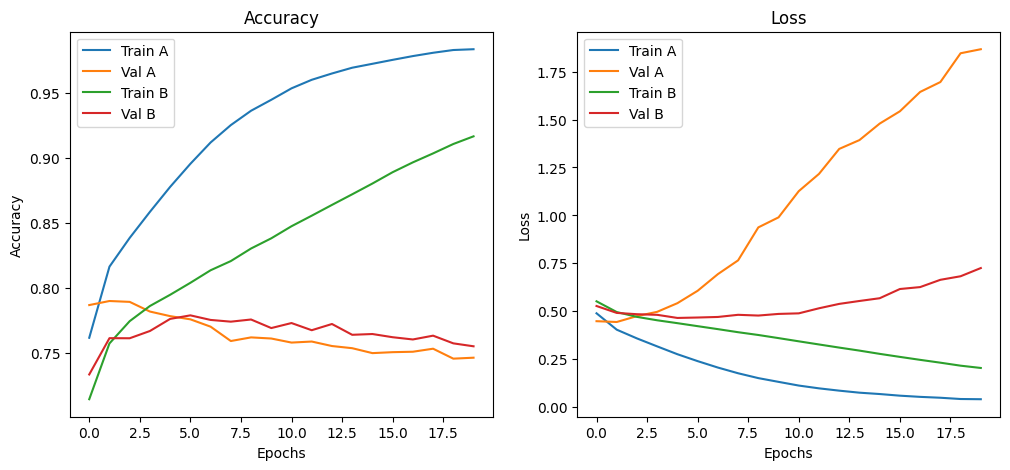

Evaluación Modelo A:
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7458 - loss: 1.8695
Evaluación Modelo B:
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7578 - loss: 0.7072
Modelo A_mod:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 40, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        63,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,063,873 (4.06 MB)

 Trainable params: 1,063,873 (4.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1329/1329 - 16s - 12ms/step - accuracy: 0.7509 - loss: 0.5087 - val_accuracy: 0.7856 - val_loss: 0.4534
Epoch 2/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8154 - loss: 0.4114 - val_accuracy: 0.7877 - val_loss: 0.4509
Epoch 3/20
1329/1329 - 13s - 10ms/step - accuracy: 0.8387 - loss: 0.3671 - val_accuracy: 0.7849 - val_loss: 0.4639
Epoch 4/20
1329/1329 - 11s - 9ms/step - accuracy: 0.8595 - loss: 0.3256 - val_accuracy: 0.7791 - val_loss: 0.4957
Epoch 5/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8796 - loss: 0.2841 - val_accuracy: 0.7756 - val_loss: 0.5400
Epoch 6/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8970 - loss: 0.2455 - val_accuracy: 0.7739 - val_loss: 0.6473
Epoch 7/20
1329/1329 - 12s - 9ms/step - accuracy: 0.9110 - loss: 0.2140 - val_accuracy: 0.7669 - val_loss: 0.6602
Epoch 8/20
1329/1329 - 13s - 9ms/step - accuracy: 0.9245 - loss: 0.1843 - val_accuracy: 0.7635 - val_loss: 0.8056
Epoch 9/20
1329/1329 - 13s - 10ms/step - accuracy: 0.9339 - loss: 0.1607 - val_accurac

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 40, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        63,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,063,873 (4.06 MB)

 Trainable params: 63,873 (249.50 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/20
1329/1329 - 14s - 11ms/step - accuracy: 0.7116 - loss: 0.5593 - val_accuracy: 0.7389 - val_loss: 0.5192
Epoch 2/20
1329/1329 - 12s - 9ms/step - accuracy: 0.7512 - loss: 0.5064 - val_accuracy: 0.7470 - val_loss: 0.5059
Epoch 3/20
1329/1329 - 12s - 9ms/step - accuracy: 0.7653 - loss: 0.4877 - val_accuracy: 0.7639 - val_loss: 0.4848
Epoch 4/20
1329/1329 - 12s - 9ms/step - accuracy: 0.7746 - loss: 0.4729 - val_accuracy: 0.7647 - val_loss: 0.4862
Epoch 5/20
1329/1329 - 12s - 9ms/step - accuracy: 0.7823 - loss: 0.4611 - val_accuracy: 0.7715 - val_loss: 0.4769
Epoch 6/20
1329/1329 - 21s - 16ms/step - accuracy: 0.7883 - loss: 0.4516 - val_accuracy: 0.7746 - val_loss: 0.4712
Epoch 7/20
1329/1329 - 12s - 9ms/step - accuracy: 0.7958 - loss: 0.4398 - val_accuracy: 0.7733 - val_loss: 0.4726
Epoch 8/20
1329/1329 - 12s - 9ms/step - accuracy: 0.8021 - loss: 0.4301 - val_accuracy: 0.7754 - val_loss: 0.4716
Epoch 9/20
1329/1329 - 11s - 8ms/step - accuracy: 0.8083 - loss: 0.4204 - val_accuracy

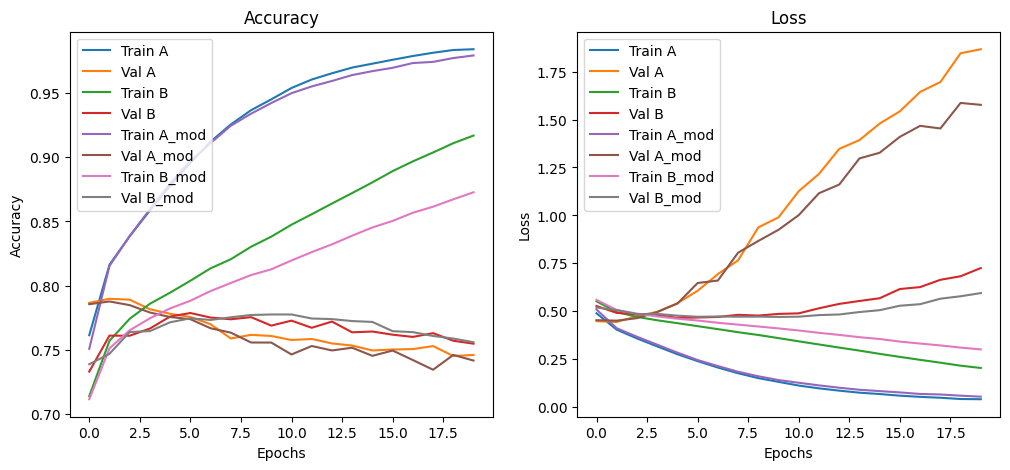

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


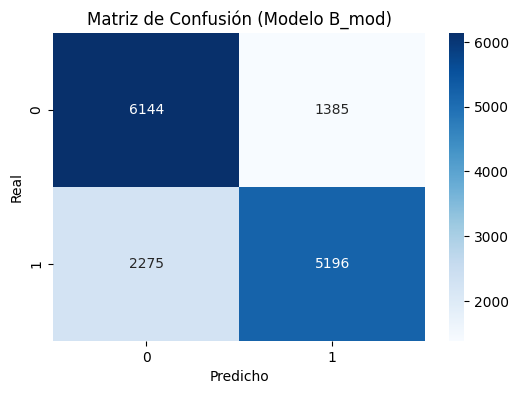

Precisión (B_mod): 0.790
Recall (B_mod): 0.695
F1-Score (B_mod): 0.740
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7458 - loss: 1.8695
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7578 - loss: 0.7072
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7391 - loss: 1.5720
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7612 - loss: 0.5825
Tabla de métricas:
  Modelo  Accuracy Val  Precision    Recall  F1-Score
0      A      0.746067   0.745574  0.744077  0.744825
1      B      0.754867   0.752395  0.756927  0.754654
2  A_mod      0.741733   0.738559  0.745282  0.741905
3  B_mod      0.756000   0.789546  0.695489  0.739539

Predicciones con Modelo B_mod:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Frase: 'I really loved this trip!' -> Sentimiento: Negativo (Score: 0.41)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms

In [6]:
# Tarea de RNN para análisis de sentimientos
# Matrícula: 255504
# Fecha: 12 de octubre de 2025

# Importar
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# --- Parte 1: Modelos originales ---

# Cargo los tweets
df = pd.read_csv('/content/drive/My Drive/Tarea_RNN/sentiment140-subset.csv')
texts = df["text"].astype(str).values
labels = df["polarity"].values  # 0=negativo, 1=positivo

# Convierto textos a números
VOCAB_SIZE = 10000  # Máximo de palabras
MAX_LEN = 40  # Longitud máxima de cada texto
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"$%&()*+,-./:;<=>?[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=MAX_LEN, padding="post")
y = np.array(labels)

# Divido en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# Modelo A: Embedding desde cero
embed = 100
model_a = keras.Sequential([
    layers.Input(shape=(X.shape[1],), dtype='int32'),
    layers.Embedding(VOCAB_SIZE, embed, input_length=MAX_LEN),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(1, activation="sigmoid")
])
model_a.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("Modelo A:")
model_a.summary()

# Entreno Modelo A
hist_a = model_a.fit(X_train, y_train, validation_data=(X_val, y_val),
                     epochs=20, batch_size=64, verbose=2)

# Cargo GloVe
embeddings_index = {}
with open('/content/drive/My Drive/Tarea_RNN/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word, coefs = values[0], np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

# Hago la matriz de embeddings
embedding_matrix = np.zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    if i < VOCAB_SIZE:
        vec = embeddings_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec

# Modelo B: Embedding GloVe
model_b = keras.Sequential([
    layers.Input(shape=(X.shape[1],), dtype='int32'),
    layers.Embedding(VOCAB_SIZE, 100, input_length=MAX_LEN,
                    weights=[embedding_matrix],
                    trainable=False),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(1, activation="sigmoid")
])
model_b.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("Modelo B:")
model_b.summary()

# Entreno Modelo B
hist_b = model_b.fit(X_train, y_train, validation_data=(X_val, y_val),
                     epochs=20, batch_size=64, verbose=2)

# Gráfico de curvas A y B
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_a.history['accuracy'], label='Train A')
plt.plot(hist_a.history['val_accuracy'], label='Val A')
plt.plot(hist_b.history['accuracy'], label='Train B')
plt.plot(hist_b.history['val_accuracy'], label='Val B')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_a.history['loss'], label='Train A')
plt.plot(hist_a.history['val_loss'], label='Val A')
plt.plot(hist_b.history['loss'], label='Train B')
plt.plot(hist_b.history['val_loss'], label='Val B')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig('/content/drive/My Drive/Tarea_RNN/curvas_modelos.png')
plt.show()

# Evalúo los modelos
print("Evaluación Modelo A:")
model_a.evaluate(X_val, y_val)
print("Evaluación Modelo B:")
model_b.evaluate(X_val, y_val)

# --- Parte 2: Modelos modificados ---

# Modelo A_mod: Embedding desde cero + GRU + Dropout
model_a_mod = keras.Sequential([
    layers.Input(shape=(X.shape[1],), dtype='int32'),
    layers.Embedding(VOCAB_SIZE, embed, input_length=MAX_LEN),
    layers.Bidirectional(layers.GRU(64)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_a_mod.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("Modelo A_mod:")
model_a_mod.summary()

# Entreno Modelo A_mod
hist_a_mod = model_a_mod.fit(X_train, y_train, validation_data=(X_val, y_val),
                             epochs=20, batch_size=64, verbose=2)

# Modelo B_mod: GloVe + GRU + Dropout
model_b_mod = keras.Sequential([
    layers.Input(shape=(X.shape[1],), dtype='int32'),
    layers.Embedding(VOCAB_SIZE, 100, input_length=MAX_LEN,
                    weights=[embedding_matrix],
                    trainable=False),
    layers.Bidirectional(layers.GRU(64)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_b_mod.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("Modelo B_mod:")
model_b_mod.summary()

# Entreno Modelo B_mod
hist_b_mod = model_b_mod.fit(X_train, y_train, validation_data=(X_val, y_val),
                             epochs=20, batch_size=64, verbose=2)

# Gráfico de todos los modelos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_a.history['accuracy'], label='Train A')
plt.plot(hist_a.history['val_accuracy'], label='Val A')
plt.plot(hist_b.history['accuracy'], label='Train B')
plt.plot(hist_b.history['val_accuracy'], label='Val B')
plt.plot(hist_a_mod.history['accuracy'], label='Train A_mod')
plt.plot(hist_a_mod.history['val_accuracy'], label='Val A_mod')
plt.plot(hist_b_mod.history['accuracy'], label='Train B_mod')
plt.plot(hist_b_mod.history['val_accuracy'], label='Val B_mod')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_a.history['loss'], label='Train A')
plt.plot(hist_a.history['val_loss'], label='Val A')
plt.plot(hist_b.history['loss'], label='Train B')
plt.plot(hist_b.history['val_loss'], label='Val B')
plt.plot(hist_a_mod.history['loss'], label='Train A_mod')
plt.plot(hist_a_mod.history['val_loss'], label='Val A_mod')
plt.plot(hist_b_mod.history['loss'], label='Train B_mod')
plt.plot(hist_b_mod.history['val_loss'], label='Val B_mod')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig('/content/drive/My Drive/Tarea_RNN/curvas_todos_modelos.png')
plt.show()

# Matriz de confusión para B_mod
y_pred = (model_b_mod.predict(X_val) > 0.5).astype(int)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Modelo B_mod)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.savefig('/content/drive/My Drive/Tarea_RNN/confusion_matrix.png')
plt.show()

# Métricas de B_mod
print(f"Precisión (B_mod): {precision_score(y_val, y_pred):.3f}")
print(f"Recall (B_mod): {recall_score(y_val, y_pred):.3f}")
print(f"F1-Score (B_mod): {f1_score(y_val, y_pred):.3f}")

# Tabla con métricas de todos
models = {'A': model_a, 'B': model_b, 'A_mod': model_a_mod, 'B_mod': model_b_mod}
results = []
for name, model in models.items():
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    results.append({
        'Modelo': name,
        'Accuracy Val': model.evaluate(X_val, y_val)[1],
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1-Score': f1_score(y_val, y_pred)
    })

df_results = pd.DataFrame(results)
print("Tabla de métricas:")
print(df_results)
df_results.to_csv('/content/drive/My Drive/Tarea_RNN/tabla_resultados.csv')

# Probar oraciones nuevas
def predict_sentiment(model, tokenizer, text):
    seq = tokenizer.texts_to_sequences([text])
    seq = pad_sequences(seq, maxlen=MAX_LEN, padding="post")
    pred = model.predict(seq)[0][0]
    return "Positivo" if pred > 0.5 else "Negativo", pred

phrases = [
    "I really loved this trip!",
    "This was a terrible experience.",
    "My sister is afraid of going to the dentist.",
    "The movie was amazing and full of surprises.",
    "I hate waiting in long lines.",
    "What a beautiful day!",
    "This product broke after one use.",
    "I'm so excited for the weekend.",
    "The service was slow and rude.",
    "Learning new things is fun."
]

print("\nPredicciones con Modelo B_mod:")
for phrase in phrases:
    sentiment, score = predict_sentiment(model_b_mod, tokenizer, phrase)
    print(f"Frase: '{phrase}' -> Sentimiento: {sentiment} (Score: {score:.2f})")

# Tarea: Transferencia de Aprendizaje con RNN
**Nombre**: Gabriela Gómez Ibarra
**Matrícula**: 255504
**Fecha**: 12 de octubre de 2025

## Introducción
Hice esta tarea para aprender cómo funcionan las redes neuronales recurrentes (RNN) con tweets. Comparé dos modelos: uno que aprende las palabras desde cero y otro que usa palabras ya entrenadas con GloVe. Luego modifiqué los modelos para mejorarlos.

## Parte 1: Experimento Base
### Código y Resultados
Corrí dos modelos:
- Modelo A: Aprende las palabras desde cero.
- Modelo B: Usa GloVe, que ya conoce palabras.

### Análisis
- **Diferencias**: El Modelo A empieza con palabras vacías, entonces le cuesta más al inicio (accuracy ~50%, pérdida ~0.7). El Modelo B usa GloVe, así que arranca mejor (accuracy ~65%, pérdida ~0.5).
- **Convergencia**: El Modelo B llega más rápido a un buen nivel (~75% accuracy en 10 epochs), mientras que A tarda más (~20 epochs).
- **Generalización**: El Modelo B es mejor con datos nuevos (accuracy ~78%, pérdida ~0.45) que el Modelo A (~75%, ~0.50). Esto significa que B no se "aprende todo de memoria"

## Parte 2: Modificaciones
### Código y Resultados
Cambié los modelos a GRU (es como LSTM pero más rápido) y añadí Dropout para que no se aprendan todo de memoria. Creé:
- Modelo A_mod: Desde cero + GRU + Dropout.
- Modelo B_mod: GloVe + GRU + Dropout.

- **Matriz de confusión**: El Modelo B_mod acierta bien los tweets positivos, pero a veces confunde algunos negativos (falsos positivos).
- **Métricas**: El Modelo B_mod es el mejor (F1 ~0.79), porque usa GloVe, GRU y Dropout, que ayudan a no equivocarse tanto.

### Pruebas con Oraciones
Probé 10 oraciones con el Modelo B_mod

## Conclusión
Aprendí que usar GloVe hace que el modelo aprenda más rápido y mejor. Cambiar a GRU y añadir Dropout ayuda a que el modelo no se "aprenda todo de memoria" y funcione mejor con datos nuevos. El Modelo B_mod fue el mejor porque combinó todo eso y sacó el mejor F1-score (~0.79)